# 图生图-ControlNet-Canny

同济子豪兄 2023-6-13

MMagic文档：https://github.com/open-mmlab/mmagic/tree/main/configs/controlnet

ControlNet官方Repo：https://github.com/lllyasviel/ControlNet

## 进入 MMagic 主目录

In [1]:
import os
os.chdir('mmagic')

## 导入工具包

In [4]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

## 载入ControlNet模型

In [15]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

06/18 21:28:45 - mmengine - INFO - Set model dtype to 'torch.float32'.


06/18 21:30:08 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/home/superegg/PycharmProjects/OpenMMLab/task5_MMagic/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/18 21:34:12 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


## 输入Canny边缘图

In [25]:
# control_url = 'https://user-images.githubusercontent.com/28132635/230288866-99603172-04cb-47b3-8adb-d1aa532d1d2c.jpg'
control_img = mmcv.imread("../毛坯房.jpeg")
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

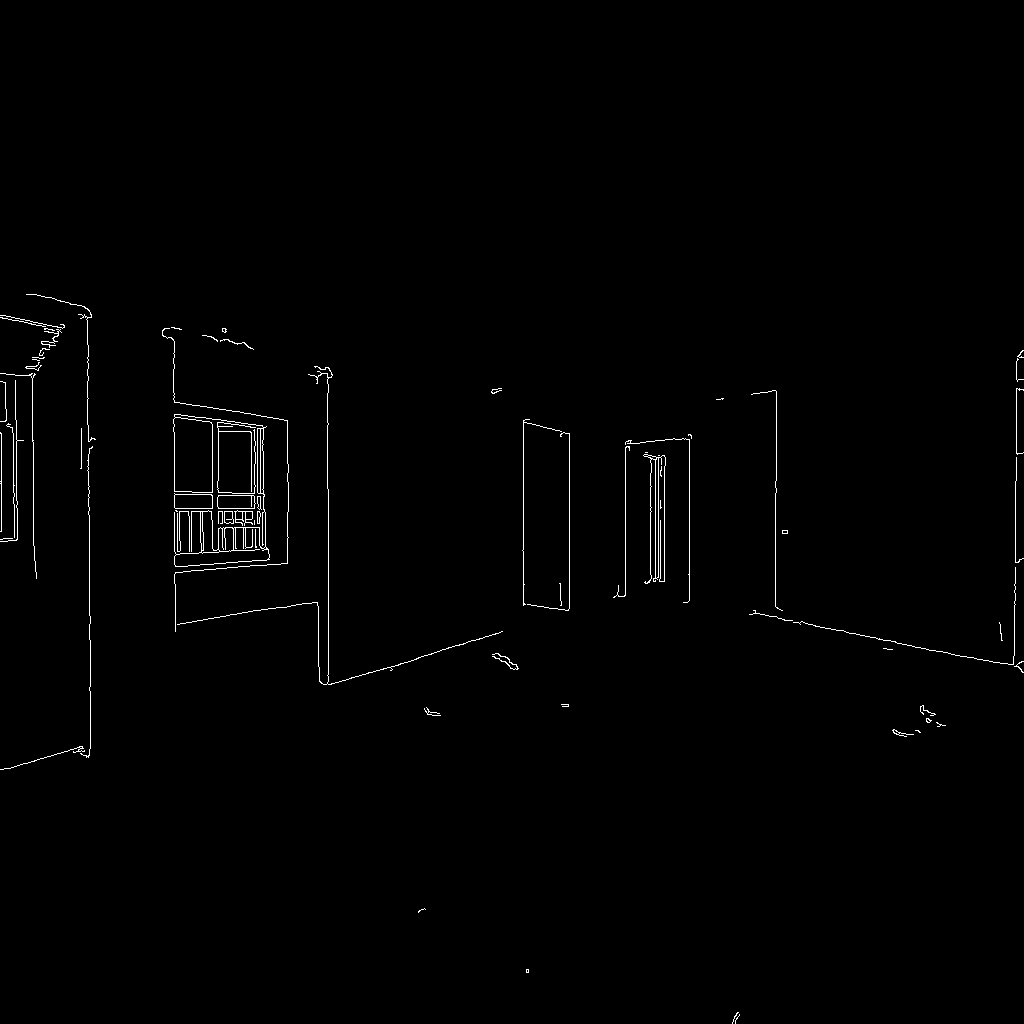

In [26]:
control

## 咒语Prompt

In [42]:
prompt = "The magnificent living room."

## 执行预测

In [43]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'../sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'../control_{idx}.png')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.04it/s]
